<a href="https://colab.research.google.com/github/Zero-Sik/Algorithm/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사이킷런에서 당뇨병 환자 데이터 가져오기 



1. load_diabetes() 함수로 당뇨병 데이터 준비하기
사이킷런의 datasets 모듈에 있는 load_diabetes 함수를 임포트한 후 매개변수 값을 넣지 않은 채로 함수를 호출하면 diabetes에 당뇨병 데이터가 저장됩니다.

In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [0]:
print(diabetes.data.shape, diabetes.target.shape) # 입력 데이터와 타깃 데이터의 크기를 확인.

(442, 10) (442,)


diabets.data를 보면 442개의 행과 10개의 열로 구성 되었있음을 알 수 있다.  행은 샘플이고 열은 샘플의 특성입니다. 


In [0]:
diabetes.data[0:3] # 특성의 값은 10개인데 그 중 3 x 10 의 크기를 나타냄.

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

타깃 데이터 자세히 보기


In [0]:
diabetes.target[:3]

array([151.,  75., 141.])

당뇨병 데이터들을 샘플과 속성을 만들었으면, 이제는 시각화를 만들 것입니다. 
맷플롯립의 scatter() 함수로 산점도 그리기

x축은 : diabetes.data의 세 번째 툭성이고, y축은 diabetes.taget입니다.

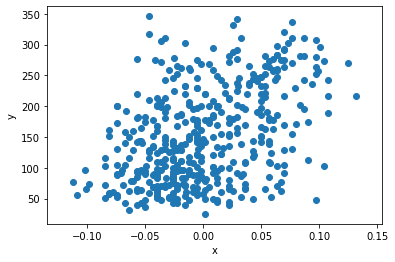

In [0]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,3], diabetes.target)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

훈련 데이터 준비하기

매번 diabetes.data를 입력하여 입력 데이터의 속성을 참고하는 방법은 번거로우니 입력 데이터의 세 번째을 미리 분리하여 변수 x에 저장하고 타깃 데이터는 변수 y에 저장함.


In [0]:
x = diabetes.data[:,2]
y = diabetes.target

# 회귀 알고리즘 중 선형 회귀 알고리즘의 개념을 알아보고 실제 알고리즘을 만들어보기 위한 당뇨병 데이터 세트를 준비 완료 했다.
# 이 데이터를 가지고 모델 훈련하기 위한 핵심 최적화 알고리즘인 경사 하강법(gradientdescent)로 사용할 것.

훈련 데이터에 맞는 w와 b 찾아보기


In [0]:
w = 1.0
b = 1.0


훈련 데이터의 첫 번째 샘플 데이터로 얻기


In [0]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


타깃과 예측 데이터 비교하기


In [0]:
print(y[0]) # x[0]에 대응하는 타깃값y[0]을 출력하여 y_hat의 값과 비교

151.0


w값 조절해 예측값 바꾸기

In [0]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat)

1.0616962065186886


w 값 조정한 후 예측값 증가 정도 확인


In [0]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


변화율이 음수일 때 가중치를 업데이트하는 방법
(변화율이 0보다 작을 때 y_hat을 증가.)

In [0]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


변화율로 절편 업데이트
[ b에 대한 변화율을 구한 다음 변화 b를 업데이트 b를 0.1만큼 증가시킨 후 y_hat이 얼마나 증가하는 지 확인.

In [0]:
b_inc = b + 0.1
y_hat_inc = x[0]* w + b_inc
print(y_hat_inc)  # 1.161

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)


1.1616962065186887
1.0


In [0]:
b_new = b + 1
print(b_new)

2.0


오차 역전파로 가중치와 절편을 더 적절하게 업그레이드 하기.

x[0]일 때 w의 변화율과 b의 변화율에 오차를 곱한 다음 업데이트 된 w_new와 b_new를 출력.

In [0]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구하기.


In [0]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_reate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new,b_new)

10.250624699916177 150.93830099572918


In [0]:
#전체 샘플을 반복하기

for x_i, y_i in zip(x,y):  #zip 함수는 여러 개의 배열에서 동시에 요소를 하나씩 꺼내줌.
  y_hat = x_i * w  + b
  err = y_i - y_hat
  w_rate= x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

585.2273902155487 99.21510569782703


전체 샘플을 시각화 시켜보기


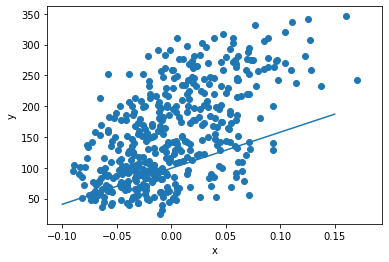

In [0]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


여러 에포크를 반복.

In [0]:
for i in range(1, 100):
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

909.4864039462036 123.09144136296428


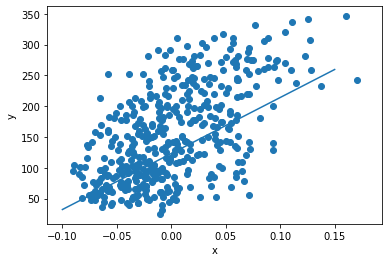

In [0]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


모델로 예측

In [0]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

286.79899407328094


지금까지의 학습 방법 TPL

1. w와 b를 임의의 값(1.0, 1.0)으로 초기화하고 훈련 데이터의 샘플을 하나씩 대입하여 y와 ^y의 오차를 구함
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트
3. 만약에 ^y이 y보다 커지면 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트
4. 반대로 ^y이 y보다 오차는 양수가 되고 w와 b는 더 커지도록 업로등.